### In the last notebook, we saw how not to load all the data in ram. Rather to stream it from harddisk. 

A common trick in CV is to augment the data: take images, and tranform them to add more datapoints. 1 way is to transform them upfront, this requires additional storage. Instead we augment data as we stream it. This removes the need for additional storage. 

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import os

### Set data paths

In [19]:
root_dir = "/"
users = os.path.join(root_dir, "Users")
airwoot = os.path.join(users, "airwoot")
documents = os.path.join(airwoot, "Documents")
anuj = os.path.join(documents, "Anuj")
Warehouse = os.path.join(anuj, "Warehouse")


In [20]:
src_folder = os.path.join(Warehouse, "train")

cat_src_folder = os.path.join(src_folder, "CAT")
dog_src_folder = os.path.join(src_folder, "DOG")

In [21]:
dest_data_folder = os.path.join(Warehouse, "cats_and_dogs")

train_dir = os.path.join(dest_data_folder, "train")
cat_train_dir = os.path.join(train_dir, "cat")
dog_train_dir = os.path.join(train_dir, "dog")


test_dir = os.path.join(dest_data_folder, "test")
cat_test_dir = os.path.join(test_dir, "cat")
dog_test_dir = os.path.join(test_dir, "dog")


validation_dir = os.path.join(dest_data_folder, "validation")
cat_validation_dir = os.path.join(validation_dir, "cat")
dog_validation_dir = os.path.join(validation_dir, "dog")


In [24]:
### sanity checks

print(len(os.listdir(cat_train_dir)))
print(len(os.listdir(dog_train_dir)))

print(len(os.listdir(cat_test_dir)))
print(len(os.listdir(dog_test_dir)))

print(len(os.listdir(cat_validation_dir)))
print(len(os.listdir(dog_validation_dir)))

2000
2000
1000
1000
1000
1000


### Set the data streams 

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
train_IDG = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    horizontal_flip= True,
    vertical_flip = True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

validation_IDG = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    horizontal_flip= True,
    vertical_flip = True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

In [28]:
train_DG = train_IDG.flow_from_directory(train_dir, target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_DG = validation_IDG.flow_from_directory(validation_dir, target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Define the model

In [29]:
from keras import Sequential
from keras import layers

In [30]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### training time

In [33]:
history = model.fit_generator(
    generator=train_DG, 
    validation_data = validation_DG,
    steps_per_epoch = 5,
    epochs = 2,
    validation_steps = 50
    )

Epoch 1/2
5/5 [==============================] - 808s 162s/step - loss: 0.7244 - acc: 0.4312 - val_loss: 0.6938 - val_acc: 0.4890
Epoch 2/2
5/5 [==============================] - 732s 146s/step - loss: 0.6958 - acc: 0.5187 - val_loss: 0.6933 - val_acc: 0.4970


### Plotting

In [41]:
from matplotlib import pyplot as plt

In [43]:
history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [44]:
train_acc = history.history['acc']
validation_acc = history.history['val_acc']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [46]:
epochs_list = range(1, (len(train_acc)+1) )

[]

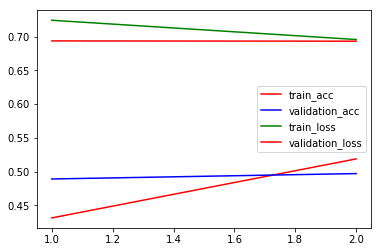

In [53]:
plt.plot(epochs_list, train_acc, 'r', label='train_acc')
plt.plot(epochs_list, validation_acc, 'b', label='validation_acc')

plt.plot(epochs_list, train_loss, 'g', label='train_loss')
plt.plot(epochs_list, validation_loss, 'r', label='validation_loss')

plt.legend()
plt.plot()
